In [1]:
import warnings
import numpy as np
import pandas as pd
from helper import display_data # This function help us to display the first 5 data points
from scipy.optimize import minimize

import seaborn as sns # seaborn will beautify our plots from matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
sns.set_style('dark')

# This is used for ignoring a harmless warning from the *scipy* package
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
display_data(data)

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ]])

In [3]:
X, y = data[:,0:2], data[:,2]
display_data(X), display_data(y)

(array([[ 34.62365962,  78.02469282],
        [ 30.28671077,  43.89499752],
        [ 35.84740877,  72.90219803],
        [ 60.18259939,  86.3085521 ],
        [ 79.03273605,  75.34437644]]), array([ 0.,  0.,  0.,  1.,  1.]))

In [4]:
def plotData(X, y, label_x, label_y, label_pos, label_neg):
    pos, neg = y == 1, y == 0
    plt.scatter(X[pos][:,0], X[pos][:,1], marker='+', c='k', s=50, linewidth=2, label=label_pos)
    plt.scatter(X[neg][:,0], X[neg][:,1], c='y', s=50, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend();

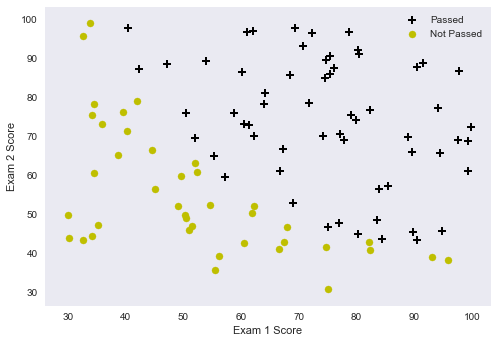

In [5]:
plotData(X, y, 'Exam 1 Score', 'Exam 2 Score', 'Passed', 'Not Passed')

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
X = np.c_[np.ones((X.shape[0],1)), X]
y = np.c_[data[:,2]]

In [8]:
initial_theta = np.zeros(X.shape[1])
initial_theta

array([ 0.,  0.,  0.])

In [9]:
def cost_function(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    J = -1 * (1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))

    if np.isnan(J[0]): # for the optimization start point
        return(np.inf)
    return J[0]

In [10]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(np.c_[theta]))
    grad = (1 / m) * np.dot(X.T, (h - y))
    return grad.flatten()

In [11]:
cost_function(initial_theta, X, y)

0.69314718055994518

In [12]:
gradient(initial_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
result = minimize(cost_function, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
print(result)

      fun: 0.20349770158950986
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557626e-09,   4.36433482e-07,  -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])


/Users/kul/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/kul/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [14]:
def predict(theta, X, threshold=0.5):
    return sigmoid(X.dot(theta.T)) >= threshold

In [15]:
sigmoid(np.array([1, 45, 85]).dot(result.x.T))

0.77629032493310179

In [16]:
pred = predict(result.x, X)
pred

array([False, False, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,  True], dtype=bool)

In [17]:
print(sum(pred == y.ravel()), '%')

89 %


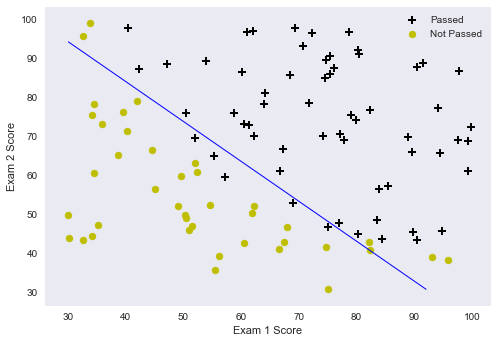

In [18]:
X, y = data[:,0:2], data[:,2]
plotData(X, y, 'Exam 1 Score', 'Exam 2 Score', 'Passed', 'Not Passed')
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
h = sigmoid(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()].dot(result.x))
h = h.reshape(xx.shape)
plt.contour(xx, yy, h, [0.5], linewidths=1, colors='b');